# Tutorial 1 - CNN Classification - Keras - Working with image files

We will predict the category of a fruit image.

In [1]:
#from __future__ import print_function
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

# Image Readers

In [2]:
#Image Data Generator manipulates and "augments" images

train_datagen = ImageDataGenerator(rescale=1/255)


# Directory Iterator reads images from a directory

train_data = DirectoryIterator(
    directory="FRUITS/Training_10",
    image_data_generator = train_datagen,
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=100,
    class_mode="categorical",
    shuffle=True,
    seed=42)

Found 4844 images belonging to 10 classes.


In [3]:
valid_datagen = ImageDataGenerator(rescale=1/255)

valid_data = DirectoryIterator(
    directory="FRUITS/Test_10",
    image_data_generator = valid_datagen,
    target_size=(16, 16),
    color_mode="rgb",
    batch_size=100,
    class_mode="categorical",
    shuffle=True,
    seed=42)

Found 1619 images belonging to 10 classes.


# Model

In [4]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', 
                 input_shape=(16,16,3)))

#model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

#model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))

#### FIXED!!!!!!!
model.add(Dense(10, activation='softmax'))

model.summary()

# initiate adam optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 16)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 8, 8, 16)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 3, 3, 32)          0

In [5]:
model.fit(
        train_data,
        epochs=5,
        validation_data=valid_data,
        )

Epoch 1/5
49/49 [==============================] - 45s 897ms/step - loss: 1.2551 - accuracy: 0.5279 - val_loss: 0.3735 - val_accuracy: 0.9024
Epoch 2/5
49/49 [==============================] - 5s 109ms/step - loss: 0.4555 - accuracy: 0.8293 - val_loss: 0.2682 - val_accuracy: 0.9154
Epoch 3/5
49/49 [==============================] - 5s 104ms/step - loss: 0.3266 - accuracy: 0.8852 - val_loss: 0.3738 - val_accuracy: 0.8116
Epoch 4/5
49/49 [==============================] - 5s 102ms/step - loss: 0.1627 - accuracy: 0.9420 - val_loss: 0.1921 - val_accuracy: 0.9055
Epoch 5/5
49/49 [==============================] - 5s 109ms/step - loss: 0.1393 - accuracy: 0.9505 - val_loss: 0.1032 - val_accuracy: 0.9524


# Predict a single image

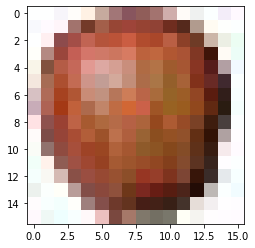

In [6]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from matplotlib import pyplot as plt


img = load_img("FRUITS/Test_10/Apple Red 1/3_100.jpg",
               color_mode='rgb',
               target_size=(16,16)
              )


plt.imshow(img)

In [7]:
#Convert the image to array
single_image = img_to_array(img)

#Also divide the image values by 255 to normalize
img_rank4 = np.expand_dims(single_image/255, axis=0)

model.predict(img_rank4)

array([[2.3701964e-06, 5.9523654e-07, 3.2563743e-09, 7.8031592e-10,
        1.2196672e-07, 9.8319107e-01, 7.1806835e-07, 1.8809624e-05,
        1.6786395e-02, 1.9346379e-08]], dtype=float32)

In [8]:
np.round(model.predict(img_rank4),2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.98, 0.  , 0.  , 0.02, 0.  ]],
      dtype=float32)

In [9]:
# We can predict the class directly using the following function:

np.argmax(model.predict(img_rank4), axis=-1)

array([5], dtype=int64)

In [10]:
# We can retrieve the class labels from the train_generator:

label_map = (train_data.class_indices)

label_map

{'Apple Braeburn': 0,
 'Apple Golden 1': 1,
 'Apple Golden 2': 2,
 'Apple Golden 3': 3,
 'Apple Granny Smith': 4,
 'Apple Red 1': 5,
 'Apple Red 2': 6,
 'Apple Red 3': 7,
 'Apple Red Delicious': 8,
 'Apple Red Yellow': 9}

In [11]:
# We can retrieve the class label of the prediction:

list(label_map.keys())[np.argmax(model.predict(img_rank4), axis=-1)[0]]

'Apple Red 1'